<h1 align="center"> Naive Bayes Classification</h1>
<br></br><br></br>

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very **high-demensional dataset**. Therefore, it end up being very useful as a quick-and-dirty baseline for a **classification problem**



## 1. Bayes' Theorem
Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(A~|~{B})$. 


Mathematically, conditional probability of A given B is expressed by
the following **formula**: 
$$P(A~|~B) = \frac{P(A \cap B)}{P(B)}$$


However, based on this **formula**: $P(A \cap B)=P(A~|~B)\cdot P(B)$

The same applies for **B given A**: $P(A \cap B)=P(B~|~A)\cdot P(A)$

Therefore, The propability of **A given B** can be re-written as Bayes's Rule:
$$P(A~|~B) = \frac{P(B~|~A)P(A)}{P(B)}$$
 
 If we are trying to decide between two labels, $A_1$ and $A_2$, one way to make decision is compute the ratio of the posterior probabilities for each label:

$$\frac{P(A_1~|~B)}{P(A_2~|~B)} = \frac{P(B~|~A_1)P(A_1)}{P(B~|~A_2)P(A_2)}$$

The important things need to know is some model by which we can compute $P(B~|~A_i)$ for each label. This is called a **generative model**, because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such Bayesian classifier.

## 2. Data Classification
<img src="CD.png" style="width: 60%;"/>
Machine learning involves building models of data based on **features** available in the data. In *Supervised Learning* features have some labels associated with them.

For example, 2D data will have 2 **features** represented by the (x,y) positions of the points on the plane.

The data is classified with 2 or more class **labels**, which can be represented by colors of the points.

Assuming that the 2 classes of data can be separated by drawing a line between the data points, the line represents the **model**.

The numbers describing the location and orientation of the line are **model parameters** - values for these model parameters are "learned" from the data, which is known as training the model.

Once the model has been trained, it can be generalized to new data. Assigning labels to new unclassfield points based on the model is called **prediction**
<img src="TD.png" style="width: 50%;"/>

## 3. Naive Bayes Classification

Naive Bayes classifier calculates the probabilities for every feature
available in the data and selects the outcome with **highest
probability**. It is a popular and powerful algorithm used for:
* Real-time prediction
* Text Classification (e.g. spam filtering)
* Recommendation Systems (e.g. online shopping)


**Code Example:**

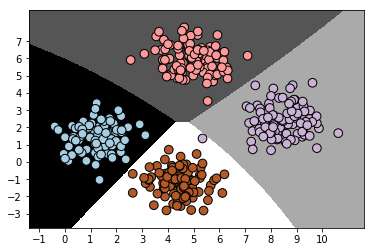

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

'''======================Visualzation Function=========================''' 
def visualize_classifier(classifier, x,y):
    # Define the min and max values for x and y
    # that will be used in the mesh grid
    min_x = x[:,0].min()-1.0 # show the first col of x's min value-1
    max_x = x[:,0].max()+1.0 # show the first col of x's max value+1
    min_y = x[:,1].min()-1.0 # show the second col of x's min value-1
    max_y = x[:,1].max()+1.0 # show the second col of x's max value+1
    
    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of x and y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), 
                                 np.arange(min_y, max_y, mesh_step_size))
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    
    # Overlay the training points on the plot
    plt.scatter(x[:, 0], x[:, 1], c=y, s=75, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(x[:, 0].min() - 1), 
                          int(x[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(x[:, 1].min() - 1), 
                          int(x[:, 1].max() + 1), 1.0)))
    
    #plt.show() # only don't call in jupyter 
    
    
'''==============================Main==================================''' 
# Load data from input file
input_file = 'data_multivar_nb.txt'
data = np.loadtxt(input_file,delimiter=',')
x = data[:,:-1]
#print('\n x Data: \n',x)
y = data[:,-1]
#print('\n y Data: \n',y)

# Create Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier and predict the value for training data
classifier.fit(x,y)
y_pred = classifier.predict(x)

# Visualize the performance of the classifier
visualize_classifier(classifier,x,y)


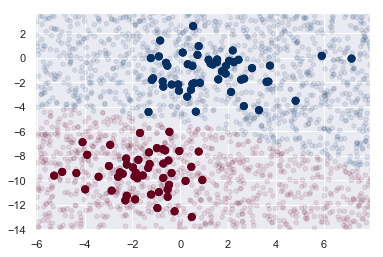

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
Aq